<a href="https://colab.research.google.com/github/PawinData/UC/blob/master/Intra_Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import str_to_day, day_to_str

In [1]:
# import the dataframe of daily new confirmed cases per 1 million population
# each row = time series for a county
DF = pd.read_csv("https://raw.githubusercontent.com/PawinData/UC/master/Daily_New_Cases.csv", index_col=0)
DF

,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10
Imperial,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.918959,0.000000,0.000000,0.000000,28.648698,0.000000,45.837917,22.918959,22.918959,0.000000,45.837917,28.648698,28.648698,40.108177,28.648698,0.000000,11.459479,63.027136,28.648698,11.459479,22.918959,0.000000
Kern,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.190999,0.000000,1.190999,0.000000,2.381999,1.190999,0.000000,10.718994,11.909994,10.718994,9.527995,7.145996,4.763998,29.774984,29.774984,10.718994,53.594972,52.403973,7.145996,23.819988,25.010987,25.010987,50.021974,25.010987,39.302980
Los Angeles,0.0000,0.09961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.597663,0.398442,0.199221,0.099610,0.0,0.498052,0.099610,0.796884,0.398442,0.796884,1.294936,1.593767,2.490261,4.980523,4.582081,4.084029,6.076238,5.877017,6.972732,11.455202,12.550917,13.646632,41.537559,24.803003,33.767944,33.070671,33.668333,53.490813,50.502500,52.494709,51.897046,70.823032,66.041731,41.836390,54.785749,61.758481,42.334443,47.314965
Orange,0.3322,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.664401,0.000000,0.000000,0.000000,0.000000,0.0,0.664401,0.000000,0.332200,0.000000,2.325402,0.332200,0.996601,1.661002,2.325402,4.318604,3.654203,3.986404,4.318604,5.647405,9.966009,8.969408,11.627011,22.921821,21.593020,0.000000,36.542034,10.962610,12.623612,34.548832,16.610015,18.271017,24.915023,15.945615,15.945615,16.277815,28.237026,20.928619,19.599818
Riverside,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.404769,0.0,1.214306,0.000000,0.000000,0.809538,1.619075,0.000000,0.809538,0.809538,0.809538,0.000000,2.428613,2.428613,0.809538,6.071532,1.214306,4.452457,19.428904,0.000000,31.571968,0.000000,4.047688,38.857807,32.381506,0.000000,49.381797,58.691480,10.928758,54.239022,59.501017,28.333818,65.977318,40.881651,28.333818
San Bernardino,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458698,0.458698,0.458698,0.917395,0.000000,1.834791,0.000000,3.669582,0.000000,9.632652,7.339163,0.458698,4.128279,0.000000,21.558792,0.000000,33.026235,32.567538,22.934886,22.476188,0.000000,8.7152

In [0]:
# the number of days that have been reported so far
k_days = len(list(DF.columns))

## **Intra-Region Temporal Correlation**

In [0]:
H = dict()   # a histogram of pairwise delta t
S = dict()   # sum of pairwise differences over all delta t

for cnty in DF.index:               # looping through every county
    for day1 in DF.columns:             # for every two days
        t1 = str_to_day(day1)
        for day2 in DF.columns:         # compute the |diff| in number of new cases
            delta = abs(t1 - str_to_day(day2))
            if delta==0:
                continue
            H[delta] = H.get(delta,0) + 1    # count records (to compute average)
            # add up total |diff|
            S[delta] = S.get(delta,0) + abs(DF[day1][cnty] - DF[day2][cnty])

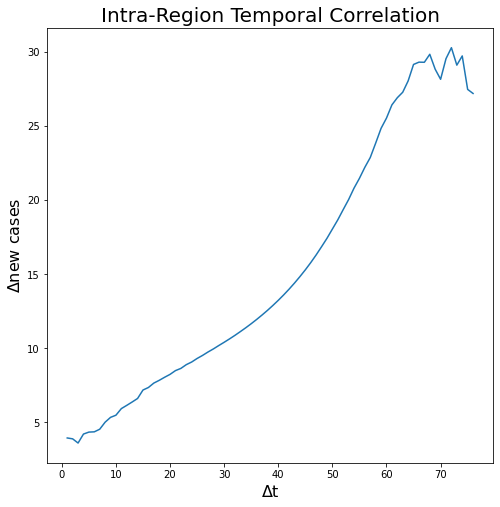

In [11]:
# plot the average |diff| against |delta t|
plt.figure(figsize=(8,8))
plt.plot(list(H.keys()), [int(S[delta])/int(H[delta]) for delta in H.keys()])
plt.title("Intra-Region Temporal Correlation", fontsize=20)
plt.xlabel("$\Delta$t", fontsize=16)
plt.ylabel("$\Delta$new cases", fontsize=16)
plt.savefig("Intra_Region_Tempo.png")
plt.savefig("Intra_Region_Tempo.eps")
plt.show()

To study intra-region temporal correlation, we show how $|n_t - n_{t+\Delta t}|$ changes with $\Delta t$ on average over all counties. From the figure above, we note that the differences in daily new cases are highly correlated with $\Delta t$. Particularly, two consecutive days share similar numbers of new cases; while as $\Delta t$ increases, the difference tends to grow.





## **Inter-Region Spatial Correlation**

In [0]:
# load distance matrices
url1 = "https://raw.githubusercontent.com/PawinData/UC/master/DistanceMatrix_shortestnetworks.csv"
url2 = "https://raw.githubusercontent.com/PawinData/UC/master/DistanceMatrix_populous.csv"
Dist_1 = pd.read_csv(url1, index_col=0)  # shortest-network distance
Dist_2 = pd.read_csv(url2, index_col=0)  # populous-center distance

In [0]:
H_1 = dict() # a histogram of pairwise shortest-network distances
S_1 = dict() # sum of pairwise differences over all distances

H_2 = dict() # a histogram of pairwise populous-center distances
S_2 = dict() # sum of pairwise differences over all distances

for date in DF.columns:
    for A in DF.index:
        for B in DF.index:
            if A==B:
                continue
            # shortest-network distance
            d1 = Dist_1[A][B]
            H_1[d1] = H_1.get(d1,0) + 1
            S_1[d1] = S_1.get(d1,0) + abs(DF[date][A] - DF[date][B])
            # populous-center distance
            d2 = Dist_2[A][B]
            H_2[d2] = H_2.get(d2,0) + 1
            S_2[d2] = S_2.get(d2,0) + abs(DF[date][A] - DF[date][B])

In [0]:
# sort by ascending distances

lst_1 = list(H_1.keys())
lst_1.sort()

lst_2 = list(H_2.keys())
lst_2.sort()

Text(0, 0.5, '$\\Delta$ daily new cases')

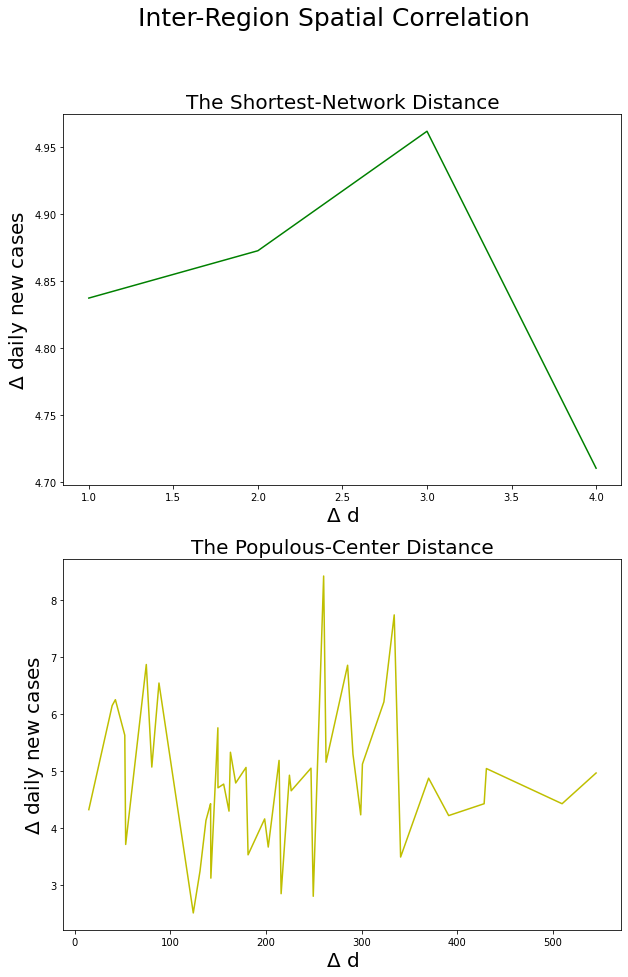

In [16]:
fig, axs = plt.subplots(2, figsize=(10,15))
fig.suptitle("Inter-Region Spatial Correlation", fontsize=25)
# the subplot for shortest-network distance
axs[0].plot(lst_1, [int(S_1[delta])/int(H_1[delta]) for delta in lst_1], 'g')
axs[0].set_title("The Shortest-Network Distance", fontsize=20)
axs[0].set_xlabel("$\Delta$ d", fontsize=20)
axs[0].set_ylabel("$\Delta$ daily new cases", fontsize=20)
# the subplot for populous-center distance
axs[1].plot(lst_2, [int(S_2[delta])/int(H_2[delta]) for delta in lst_2], 'y')
axs[1].set_title("The Populous-Center Distance", fontsize=20)
axs[1].set_xlabel("$\Delta$ d", fontsize=20)
axs[1].set_ylabel("$\Delta$ daily new cases", fontsize=20)